In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import os
import re 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report


In [2]:
celular = pd.read_csv('dados/celular_train.csv', sep=',',  encoding='latin-1')
celular.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
dados = celular.loc[:, ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep'	,'mobile_wt','n_cores',	'px_height','px_width','ram','sc_h'	,'sc_w','talk_time','three_g','touch_screen','wifi', 'price_range']]

dados.head(3)
dados.shape

(2000, 20)

In [4]:
features = ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep'	,'mobile_wt','n_cores',	'px_height','px_width','ram','sc_h'	,'sc_w','talk_time','three_g','touch_screen','wifi']
X = dados.loc[:, features]
y = dados.loc[:, ['price_range']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .60)

X_train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
891,1652,0,0.6,1,4,1,40,1.0,198,7,352,1084,3592,7,6,6,1,0,0
1796,793,1,2.8,1,1,1,64,0.4,179,4,818,1006,2296,12,0,5,1,1,0
1868,1766,1,0.5,1,1,1,22,0.8,122,8,291,1318,3297,7,5,16,1,0,0


## Árvore de Decisão

* Importando a função `DecisionTreeClassifier` da biblioteca `sklearn.tree` e `cross_val_score` de `sklearn.model_selection`:

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

* Fazendo a Árvore de Decisão sem utilizar os argumentos `max_depth` e `min_samples_leaf`:

In [34]:
arvre = DecisionTreeClassifier(criterion = "gini", random_state = 100)
arvre.fit(X_train, y_train)

p = arvre.predict(X_test)

mae = mean_absolute_error(y_test, p)
print(mae)

scores = cross_val_score(arvre, y_test, p)
print(scores)

print(f'Acurácia média para 4 cross-validations: {scores.mean()*100:.5f}%\n'
      f'Erro médio absoluto: {mae*100:.3f}%')

0.15375
[0.85625 0.85625 0.81875 0.9     0.80625]
Acurácia média para 4 cross-validations: 84.75000%
Erro médio absoluto: 15.375%


In [7]:
scores = cross_val_score(estimator=arvre, X=X, y=y, cv=7, n_jobs=4)
scores.mean()

0.817472001682528

In [18]:
#visualizando a árvore 
import io
from io import StringIO
from sklearn.tree import export_graphviz 

# from sklearn.externals.six import StringIO   
from IPython.display import Image   
import pydotplus 
import graphviz
 
#feature_cols = features
#print(feature_cols)
dot_data = StringIO() 
export_graphviz(arvre, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = features,class_names=['0','1','2','3'])

from pydot import graph_from_dot_data 
(graph, ) = graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

FileNotFoundError: [WinError 2] "dot" not found in path.

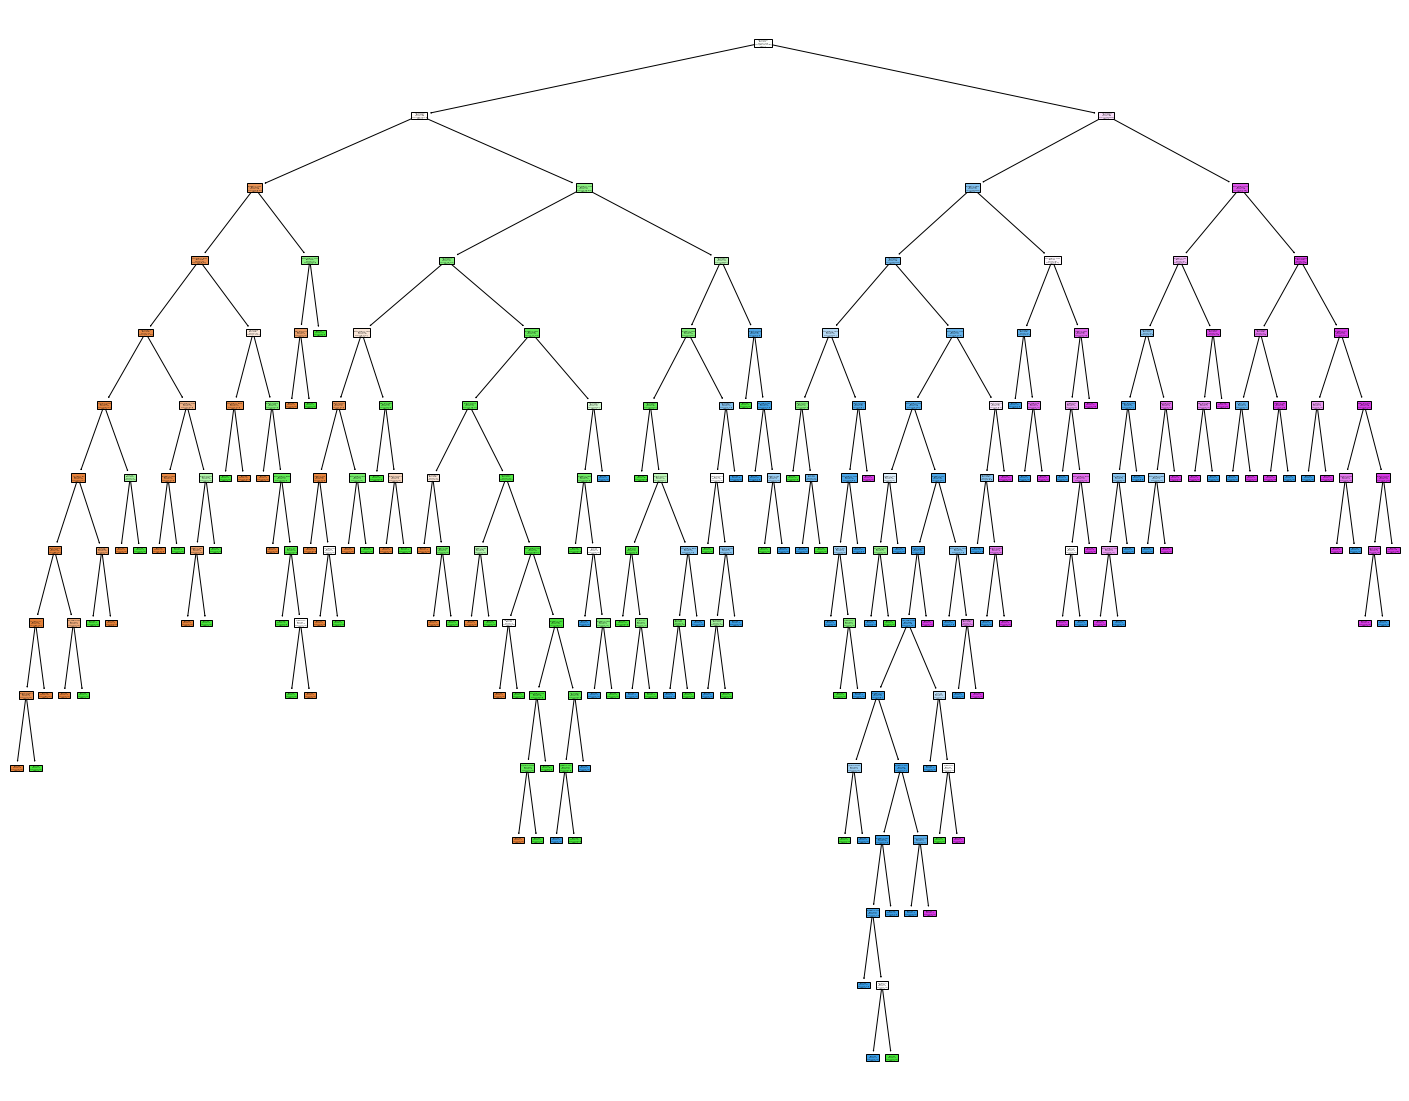

In [24]:
from sklearn import tree
target_names = ['0', '1','2','3']
fig = plt.figure(figsize=(25,20))
plot= tree.plot_tree (arvre,feature_names=features,class_names=target_names,filled=True) 
plt.show()

### Realizando a ***cross-validation*** para obter a acurácia da árvore

- Para cada atributo (`max_depth` e `min_samples_leaf`), realizamos a *cross-validation* 7 vezes, analisando em um `range` de $3$ a $30$:

In [ ]:
depth = []
depth_mae = []
for i in range(3,30):
    arvre = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=i)
    arvre.fit(X_train, y_train)
    p = arvre.predict(X_test)
    mae = mean_absolute_error(y_test, p)
    # Perform 7-fold cross validation
    
    scores = cross_val_score(estimator=arvre, X=X, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean(),mae))

leaves = []
for i in range(3,30):
    arvre = DecisionTreeClassifier(criterion = "gini", random_state = 100, min_samples_leaf=i)
    arvre.fit(X_train, y_train)
    p = arvre.predict(X_test)
    mae = mean_absolute_error(y_test, p)
    # Perform 7-fold cross validation
    
    scores = cross_val_score(estimator=arvre, X=X, y=y, cv=7, n_jobs=4)
    leaves.append((i,scores.mean(),mae))

* Utilizando o argumento `max_depth` igual a $7$:

In [ ]:
acc_depth = []
for i in range(len(depth)):
    acc_depth.append(depth[i][1])

for i in range(len(depth)):
    if depth[i][1] == max(acc_depth):
        ideal_depth = depth[i][0]
        print(f'Nº ideal para o atributo max_depth: {ideal_depth}\n'
              f'Acurácia obtida: {max(acc_depth)*100:.5f}%\n'
              f'Erro médio absoluto: {depth[i][2]*100:.2f}%')

Nº ideal para o atributo max_depth: 7
Acurácia obtida: 82.94933%
Erro médio absoluto: 14.75%


* Utilizando o argumento `min_samples_leaf` igual a $9$:

In [ ]:
acc_leaves = []
for i in range(len(leaves)):
    acc_leaves.append(leaves[i][1])

for i in range(len(leaves)):
    if leaves[i][1] == max(acc_leaves):
        ideal_leaf = leaves[i][0]
        print(f'Nº ideal para o atributo min_samples_leaf: {ideal_leaf}\n'
              f'Acurácia obtida: {max(acc_leaves)*100:.5f}%\n'
              f'Erro médio absoluto: {leaves[i][2]*100:.3f}%')

Nº ideal para o atributo min_samples_leaf: 9
Acurácia obtida: 84.34933%
Erro médio absoluto: 16.375%


## Regressão Logística para Multiclasses